O objetivo deste trabalho é realizar uma classificação de tipos de choro infantil usando redes neurais convolucionais.

Vamos utilizar o banco de dados "Donate a Cry", disponível no Kaggle: https://www.kaggle.com/datasets/warcoder/infant-cry-audio-corpus/data.

O banco é composto por amostras de choro infantil de 5 tipos:
- Dor
- Gases
- Desconforto
- Fome
- Sono

Essa classificação foi realizada pelos pais/tutores dos bebês, baseados no que cessou o choro.

Para alcançar nosso objetivo vamos seguir o fluxo:
- Ler os dados
- Transformar o sinal em imagem (espectrogramas)
- Desenvolver uma CNN
- Treinar a CNN
- Testar o desempenho com uma nova amostra de dados

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import numpy as np
import os
import pandas as pd
import pathlib as Path
import librosa
import librosa.display
import matplotlib.pyplot as plt


As funções a seguir transformam o sinal de áudio do arquivo .wav em imagens (espectrogramas)

In [ ]:
"""
def create_spectrogram(audio_file, image_file):
    # Cria a figura para o espectrograma
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    # Carrega o áudio e cria o espectrograma
    y, sr = librosa.load(audio_file)
    ms = librosa.feature.melspectrogram(y=y, sr=sr)
    log_ms = librosa.power_to_db(ms, ref=np.max)
    librosa.display.specshow(log_ms, sr=sr)

    # Salva o espectrograma como imagem
    fig.savefig(image_file)
    plt.close(fig)

def create_pngs_from_wavs(input_path, output_path):
    # Cria a pasta de saída se não existir
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    # Lista os arquivos na pasta de entrada
    dir = os.listdir(input_path)

    # Processa cada arquivo .wav e gera o espectrograma
    for i, file in enumerate(dir):
        if file.endswith('.wav'):  # Verifica se é um arquivo .wav
            input_file = os.path.join(input_path, file)
            output_file = os.path.join(output_path, file.replace('.wav', '.png'))
            create_spectrogram(input_file, output_file)

  """

Agora definimos as pastas que receberão as imagens

In [ ]:
"""
belly_pain='/content/drive/MyDrive/donate-a-cry-dataset/donateacry_corpus/belly_pain'
belly_pain_output='/content/drive/MyDrive/donate-a-cry-dataset/output_data/belly_pain_output'
burping='/content/drive/MyDrive/donate-a-cry-dataset/donateacry_corpus/burping'
burping_output='/content/drive/MyDrive/donate-a-cry-dataset/output_data/burping_output'
discomfort='/content/drive/MyDrive/donate-a-cry-dataset/donateacry_corpus/discomfort'
discomfort_output='/content/drive/MyDrive/donate-a-cry-dataset/output_data/discomfort_output'
hungry='/content/drive/MyDrive/donate-a-cry-dataset/donateacry_corpus/hungry'
hungry_output='/content/drive/MyDrive/donate-a-cry-dataset/output_data/hungry_output'
tired='/content/drive/MyDrive/donate-a-cry-dataset/donateacry_corpus/tired'
tired_output='/content/drive/MyDrive/donate-a-cry-dataset/output_data/tired_output'
"""

In [ ]:
"""
# Chama a função para gerar os espectrogramas
create_pngs_from_wavs(belly_pain, belly_pain_output)
create_pngs_from_wavs(hungry, hungry_output)
create_pngs_from_wavs(burping, burping_output)
create_pngs_from_wavs(discomfort, discomfort_output)
create_pngs_from_wavs(tired, tired_output)
"""


In [3]:
import tensorflow

Agora carregamos as imagens, convertemos em arrays e rotulamos os dados de imagem

In [3]:
x = []
y = []

In [4]:

x = []
y = []

from keras.preprocessing import image # type: ignore

def load_images_from_path(path, label):
    images = [] #lista para armazenar as imagens
    labels = [] #lista para armazenar os rótulos

    for file in os.listdir(path): #itera sobre os arquivos da pasta
        images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(224, 224, 3)))) #carrega, redimensiona e transforma as imagens em arrays
        labels.append((label))

    return images, labels



Separamos os arquivos de treino e teste

In [ ]:
"""
from pathlib import Path
import shutil

def move_files(source_pattern, destination_path):
    # Cria o diretório de destino se não existir
    destination = Path(destination_path)
    destination.mkdir(parents=True, exist_ok=True)

    # Obtém o diretório de origem a partir do padrão
    source_dir = Path(source_pattern).parent
    file_pattern = Path(source_pattern).name

    # Encontra e move os arquivos que correspondem ao padrão
    for file_path in source_dir.glob(file_pattern):
        shutil.move(str(file_path), destination)
        print(f"Moved {file_path} to {destination}")

# Define seus diretórios e padrões de origem
directories = {
    r'/content/drive/MyDrive/donate-a-cry-dataset/donateacry_corpus/belly_pain_train/': r'/content/drive/MyDrive/donate-a-cry-dataset/output_data/belly_pain_output/*.png',
    r'/content/drive/MyDrive/donate-a-cry-dataset/donateacry_corpus/hungry_train/': r'/content/drive/MyDrive/donate-a-cry-dataset/output_data/hungry_output/*.png',
    r'/content/drive/MyDrive/donate-a-cry-dataset/donateacry_corpus/burping_train/': r'/content/drive/MyDrive/donate-a-cry-dataset/output_data/burping_output/*.png',
    r'/content/drive/MyDrive/donate-a-cry-dataset/donateacry_corpus/discomfort_train/': r'/content/drive/MyDrive/donate-a-cry-dataset/output_data/discomfort_output/*.png',
    r'/content/drive/MyDrive/donate-a-cry-dataset/donateacry_corpus/tired_train/': r'/content/drive/MyDrive/donate-a-cry-dataset/output_data/tired_output/*.png'
}

# Move os arquivos
for directory, source_pattern in directories.items():
    move_files(source_pattern, directory)
"""

Moved /content/drive/MyDrive/donate-a-cry-dataset/output_data/belly_pain_output/643D64AD-B711-469A-AF69-55C0D5D3E30F-1430138506-1.0-m-72-bp.png to /content/drive/MyDrive/donate-a-cry-dataset/donateacry_corpus/belly_pain_train
Moved /content/drive/MyDrive/donate-a-cry-dataset/output_data/belly_pain_output/643D64AD-B711-469A-AF69-55C0D5D3E30F-1430138545-1.0-m-72-bp.png to /content/drive/MyDrive/donate-a-cry-dataset/donateacry_corpus/belly_pain_train
Moved /content/drive/MyDrive/donate-a-cry-dataset/output_data/belly_pain_output/643D64AD-B711-469A-AF69-55C0D5D3E30F-1430138524-1.0-m-72-bp.png to /content/drive/MyDrive/donate-a-cry-dataset/donateacry_corpus/belly_pain_train
Moved /content/drive/MyDrive/donate-a-cry-dataset/output_data/belly_pain_output/643D64AD-B711-469A-AF69-55C0D5D3E30F-1430138514-1.0-m-72-bp.png to /content/drive/MyDrive/donate-a-cry-dataset/donateacry_corpus/belly_pain_train
Moved /content/drive/MyDrive/donate-a-cry-dataset/output_data/belly_pain_output/643D64AD-B711-46

Agora criamos as pastas de treino com os dados rotulados

In [5]:
images, labels = load_images_from_path(r'/content/drive/MyDrive/donate-a-cry-dataset/donateacry_corpus/belly_pain_train', 0)

x += images
y += labels

In [6]:
images, labels = load_images_from_path(r'/content/drive/MyDrive/donate-a-cry-dataset/donateacry_corpus/hungry_train', 1)

x += images
y += labels

In [7]:
images, labels = load_images_from_path(r'/content/drive/MyDrive/donate-a-cry-dataset/donateacry_corpus/burping_train', 2)

x += images
y += labels

In [8]:
images, labels = load_images_from_path(r'/content/drive/MyDrive/donate-a-cry-dataset/donateacry_corpus/discomfort_train', 3)

x += images
y += labels

In [9]:
images, labels = load_images_from_path(r'/content/drive/MyDrive/donate-a-cry-dataset/donateacry_corpus/tired_train', 4)

x += images
y += labels

In [10]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [11]:
y = np.array(y)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

x_train_norm = np.array(x_train) / 255
x_test_norm = np.array(x_test) / 255

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [14]:
"""
from sklearn.utils.class_weight import compute_class_weight

# Supondo que y_train seja o vetor de rótulos das classes antes de ser convertido com `to_categorical`
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))
"""


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Normalization, Resizing, InputLayer
from tensorflow.keras.optimizers import AdamW

# Criação do modelo
model = Sequential()

# Entrada e pré-processamento
model.add(InputLayer(input_shape=(224, 224, 3)))  # Define o tamanho de entrada da imagem
model.add(Resizing(64, 64))                       # Redimensiona para reduzir a complexidade do modelo
model.add(Normalization())                        # Normalização para estabilizar o treinamento

# Camadas convolucionais
model.add(Conv2D(64, kernel_size=(3, 3), strides=1, activation='relu', padding='same'))
model.add(Conv2D(128, kernel_size=(3, 3), strides=1, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Camada convolucional adicional para maior capacidade de aprendizado
model.add(Conv2D(256, kernel_size=(3, 3), strides=1, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Camada densa e saída
model.add(Flatten())
model.add(Dense(128, activation='relu'))          # Camada totalmente conectada
model.add(Dropout(0.4))                           # Dropout para reduzir overfitting
model.add(Dense(5, activation='softmax'))         # Saída para classificação multiclasse (5 classes)

# Compilação do modelo
model.compile(optimizer=AdamW(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resizing (Resizing)                  │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ normalization (Normalization)        │ (None, 64, 64, 3)           │               7 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       8,388,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,760,204 (33.42 MB)

 Trainable params: 8,760,197 (33.42 MB)

 Non-trainable params: 7 (32.00 B)

In [17]:
# Certifique-se de usar os rótulos codificados
history = model.fit(
    x_train_norm, y_train_encoded,   # Rótulos codificados como one-hot
    validation_data=(x_test_norm, y_test_encoded),
    epochs=10,
    batch_size=32,
    verbose=1
)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.4608 - loss: 30.9891 - val_accuracy: 0.0430 - val_loss: 1.3163
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4769 - loss: 1.2991 - val_accuracy: 0.8172 - val_loss: 0.8261
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8140 - loss: 0.9260 - val_accuracy: 0.8172 - val_loss: 0.9541
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7836 - loss: 0.9634 - val_accuracy: 0.8172 - val_loss: 0.7593
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8009 - loss: 0.9059 - val_accuracy: 0.8172 - val_loss: 0.7506
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8115 - loss: 0.7782 - val_accuracy: 0.8172 - val_loss: 0.7353
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7954 - loss: 0.8523 - val_accuracy: 0.8172 - val_loss: 0.7523
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8271 - loss: 0.7936 - val_accuracy: 0.8172 - val_loss: 0.7388


In [18]:
# Avaliação do modelo nos dados de teste normalizados
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test_encoded, verbose=1)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8188 - loss: 0.7389
Test Loss: 0.7567, Test Accuracy: 0.8172


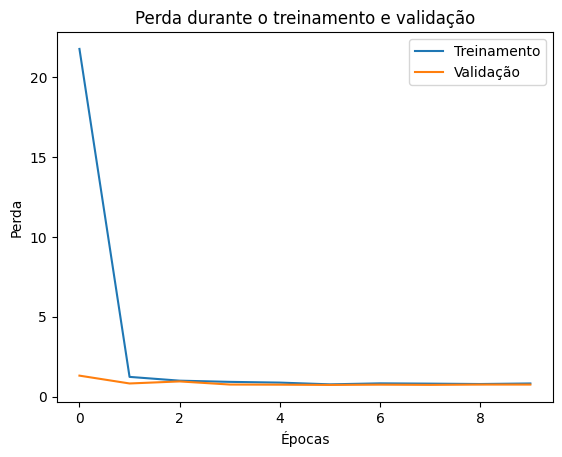

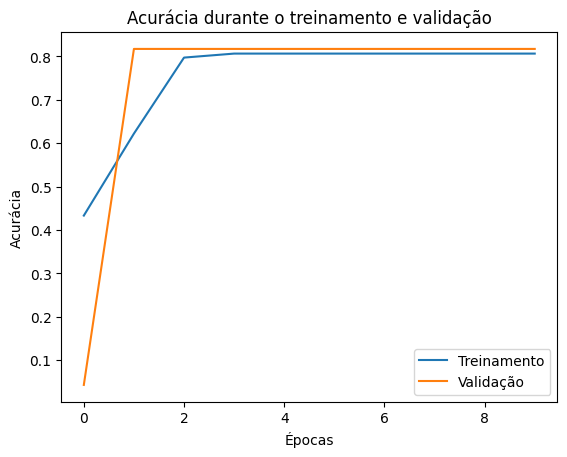

In [19]:
# Plot da perda
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda durante o treinamento e validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.show()

# Plot da acurácia
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia durante o treinamento e validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step


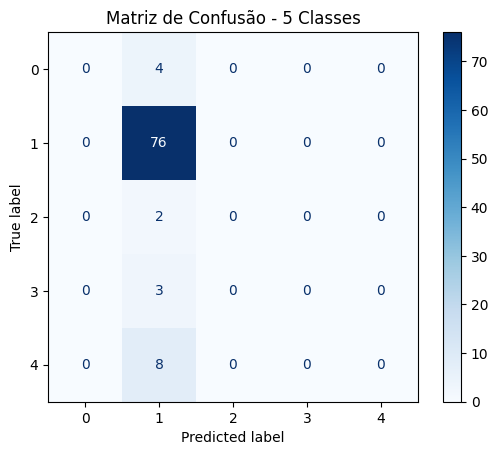

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Obtenha as previsões para os dados de teste
y_pred = model.predict(x_test_norm)                      # Previsões do modelo
y_pred_classes = np.argmax(y_pred, axis=1)               # Converte para rótulos de classe
y_true = np.argmax(y_test_encoded, axis=1)               # Converte rótulos one-hot para classe

# Gera a matriz de confusão
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Exibe a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=range(5))
disp.plot(cmap='Blues')                                  # Define o estilo da cor (opcional)
plt.title("Matriz de Confusão - 5 Classes")
plt.show()


In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test_encoded.argmax(axis=1), y_pred.argmax(axis=1)))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.82      1.00      0.90        76
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         8

    accuracy                           0.82        93
   macro avg       0.16      0.20      0.18        93
weighted avg       0.67      0.82      0.74        93



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
